<a href="https://colab.research.google.com/github/OliverGong77/NYU_Integrated_Marketing/blob/main/oliver%E2%80%9CHypothesisTesting_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

**Install the Package Pandas and Numpy for the function of "TABLE" and "Math"**

In [ ]:
import pandas as pd
import numpy as np

**Read the marketing data from Github Url ("Read Raw")**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/Q_GDP_Capita.csv',sep=";")
df.head()

,"LOCATION,Country,Measure,Frequency,TIME,Unit Code,Value"
0,"AUS,Australia,""Per Head, US $, current prices,..."
1,"AUS,Australia,""Per Head, US $, current prices,..."
2,"AUS,Australia,""Per Head, US $, current prices,..."
3,"AUS,Australia,""Per Head, US $, current prices,..."
4,"AUS,Australia,""Per Head, US $, current prices,..."


**View the data information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 1 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   LOCATION,Country,Measure,Frequency,TIME,Unit Code,Value  861 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB


**Install the pingouin Package**

In [ ]:
pip install pingouin

**Import the pingouin package**

In [ ]:
import pingouin as pg

# Hypothesis Test

**One-Sample T-test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
x=df['age']
pg.ttest(x, 30)

KeyError: ignored

In [ ]:
df['age'].mean()

**Two-Sample T-Test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
balance_housing = df[df['housing']=='yes']['balance']
balance_no_housing = df[df['housing']=='no']['balance']

In [ ]:
balance_housing.mean()

In [ ]:
balance_no_housing.mean()

In [ ]:
x=balance_housing
y=balance_no_housing
pg.ttest(x, y, paired=False)

**One-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [ ]:
aov = pg.anova(dv='balance', between='education', data=df)
aov.round(3)

In [ ]:
df.groupby('education')['balance'].mean()

**Two-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [ ]:

aov = pg.anova(dv='balance', between=['education','job'], data=df)
aov.round(3)

In [ ]:
df.groupby(['education','job'])['balance'].sum()

**Chi-Squared of Independence**

https://pingouin-stats.org/generated/pingouin.chi2_independence.html#pingouin.chi2_independence


In [ ]:
expected, observed, stats = pg.chi2_independence(df, x='loan',
                                                 y='y')

In [ ]:
expected

In [ ]:
observed

In [ ]:
stats

**Mann-Whitney U Test (= Wilcoxon rank-sum test)**

https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu

In [ ]:
balance_loan = df[df['loan']=='yes']['balance']
balance_no_loan = df[df['loan']=='no']['balance']

In [ ]:
df.groupby('loan')['balance'].median()

In [ ]:
x=balance_loan
y=balance_no_loan
pg.mwu(x, y, tail='two-sided')

#Paired Tests



**Import the data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/Q_GDP_Capita.csv')
df.head()

**Conduct the paired-t test to compare the GDP per capita for the first quarter of 2019 and 2020 for all countries**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
df_2018-Q4 = df[df.TIME=='2018-Q4'][['Country','Value','TIME']]
df_2018-Q4=df_2018-Q4.groupby(['Country','TIME']).max().reset_index()
df_2018-Q4=df_2018-Q4[['Country','Value']].sort_values(by='Country', ascending=True)
df_2018-Q4.head()

In [ ]:
df_2019-Q4 = df[df.TIME=='2019-Q4'][['Country','Value','TIME']]
df_2019-Q4=df_2019-Q4.groupby(['Country','TIME']).max().reset_index()
df_2019-Q4=df_2019-Q4[['Country','Value']].sort_values(by='Country', ascending=True)
df_2019-Q4.head()

In [ ]:
pre=df_2018-Q4['Value']
post=df_2019-Q4['Value']
from pingouin import ttest
ttest(pre, post, paired=True).round(2)

In [ ]:
df_Figure = df[df.TIME.isin(['2018-Q4','2019-Q4'])][['Country','Value','TIME']].groupby(['Country','TIME']).max().reset_index()
import plotly.express as px
fig = px.bar(df_Figure, x="Country", y="Value",
             color='TIME', barmode='group',
             height=400)
fig.show()

Conduct the Wilcoxon Signed-rank test to compare probability of GDP per capita for the first quarter of 2019 is larger than 2020 or not for all countries



In [ ]:
### install the package
import pingouin as pg
pg.wilcoxon(pre, post, tail='two-sided')

# Assumption: Pearson or Spearman Test of Correlations

**Histogram and scatterplot**

In [ ]:
#install package
import seaborn as sns

In [ ]:
df_joint= df_2018-Q4.merge(df_2019-Q4, how='inner',on="Country")
df_joint.columns =['Country','2018-Q4','2019-Q4']
df_joint.head()

**draw scatter and histgram plot**

https://seaborn.pydata.org/generated/seaborn.jointplot.html

ValueError: ignored

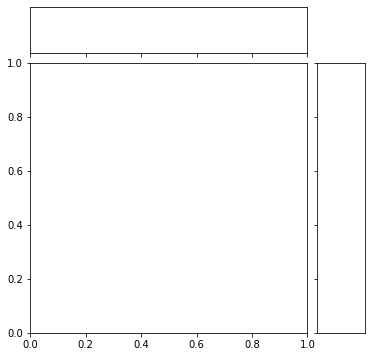

In [ ]:
#draw the plot
sns.jointplot(data=df_joint, x="2018-Q4", y="2019-Q4")

**Test for multivariate normality**

https://pingouin-stats.org/generated/pingouin.multivariate_normality.html

In [ ]:
X = df_joint[['2018-Q4', '2019-Q4']]
pg.multivariate_normality(X, alpha=.05)

**We can't reject multivariate normality, so we will use pearson test for correlations**

https://pingouin-stats.org/generated/pingouin.corr.html#pingouin.corr

In [ ]:
x=df_joint['2018-Q4']
y=df_joint['2019-Q4']
pg.corr(x, y, method="pearson").round(3)

#Power Analysis

**Power analysis for T-test**

https://pingouin-stats.org/generated/pingouin.power_ttest.html#pingouin.power_ttest


Note: For a paired T-test, the sample size n corresponds to the number of pairs. For an independent two-sample T-test with equal sample sizes, n corresponds to the sample size of each group (i.e. number of observations in one group).

In [ ]:
#install the package
from pingouin import power_ttest

d is the Cohen d effect size, Power is 1-Type II error, Alpha is the type I error

In [ ]:
### conduct the test
print('n: %.4f' % power_ttest(d=0.77, power=0.80, alpha=0.05))

**Power analysis for ANOVA**

https://pingouin-stats.org/generated/pingouin.power_anova.html#pingouin.power_anova

In [ ]:
# install the package
from pingouin import power_anova

eta is the effect size for ANOVA (the level of correlation across catergories), k is the number of categories, Power is 1-Type II error, alpha is type I error

In [ ]:
### conduct the test
print('n: %.4f' % power_anova(eta=0.1, k=3, power=0.80, alpha=0.05))

**Power analysis for Chi-square Test**

https://pingouin-stats.org/generated/pingouin.power_chi2.html#pingouin.power_chi2

In [ ]:
# install the package
from pingouin import power_chi2

dof is the degress of freedom $=(r-1)*(c-1)$, where r is the number of rows in the expected frequency table and c is the nuber of columns in the expected frequency table. W is the effect size, which is the level of correlation. Power is 1-Type II error and Alpha is the type I error. 

In [ ]:
### conduct the test
print('n: %.4f' % power_chi2(dof=1, w=0.3, power=0.80, alpha=0.05))